In [1]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import cufflinks as cf
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
plt.style.use('ggplot')
cf.go_offline()
cf.set_config_file(world_readable=True, theme='pearl')

In [3]:
df = pd.read_csv('nigerian_spotify_songs1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

In [5]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [6]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


In [7]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [8]:
a = df.artist.value_counts().head(10).reset_index()
a.columns = ['artist', 'count']


b = df.album.value_counts().head(10).reset_index()
b.columns = ['album', 'count']

fig = make_subplots(rows=1, cols=2, subplot_titles= ('Top 10 Artist Occurence', 'Top 10 album occurence'))

fig.add_trace(go.Bar(x= a['artist'], y= a['count'], marker=dict(color=a['count'], coloraxis="coloraxis")), row=1, col=1)
fig.add_trace(go.Bar(x= b['album'], y= b['count'], marker=dict(color=b['count'], coloraxis="coloraxis")), row=1, col=2)

fig.update_layout(coloraxis=dict(colorscale='emrld'), showlegend=False)
fig.show()

In [9]:
c = df.sort_values(by='popularity', ascending=False).head(10)
px.bar(c, x= 'name', y='popularity', color_discrete_sequence=px.colors.qualitative.Set2, title= 'Top 10 most popular songs')

In [10]:
pie = df.artist_top_genre.value_counts()
pie_df = pd.DataFrame({'index':pie.index, 'values': pie.values})
pie_df.iplot(kind='pie', labels= 'index', values= 'values', hole= .5, title="Value counts: genre")

In [11]:
px.sunburst(c, path=['release_date', 'artist', 'artist_top_genre'], values='popularity', title= 'Sunburst chart for top songs',
           color_discrete_sequence=px.colors.qualitative.Set2)

In [12]:
e = df.groupby(['release_date', 'artist_top_genre']).count().reset_index()

px.line(e, x='release_date', y='name', labels= {'name':'count'}, title= 'Songs over time', color= 'artist_top_genre')

C:\Users\DUYI\AppData\Local\Temp\ipykernel_2588\3276273279.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\DUYI\AppData\Local\Temp\ipykernel_2588\3276273279.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.03, 'Correlations Among Numeric Dtypes')

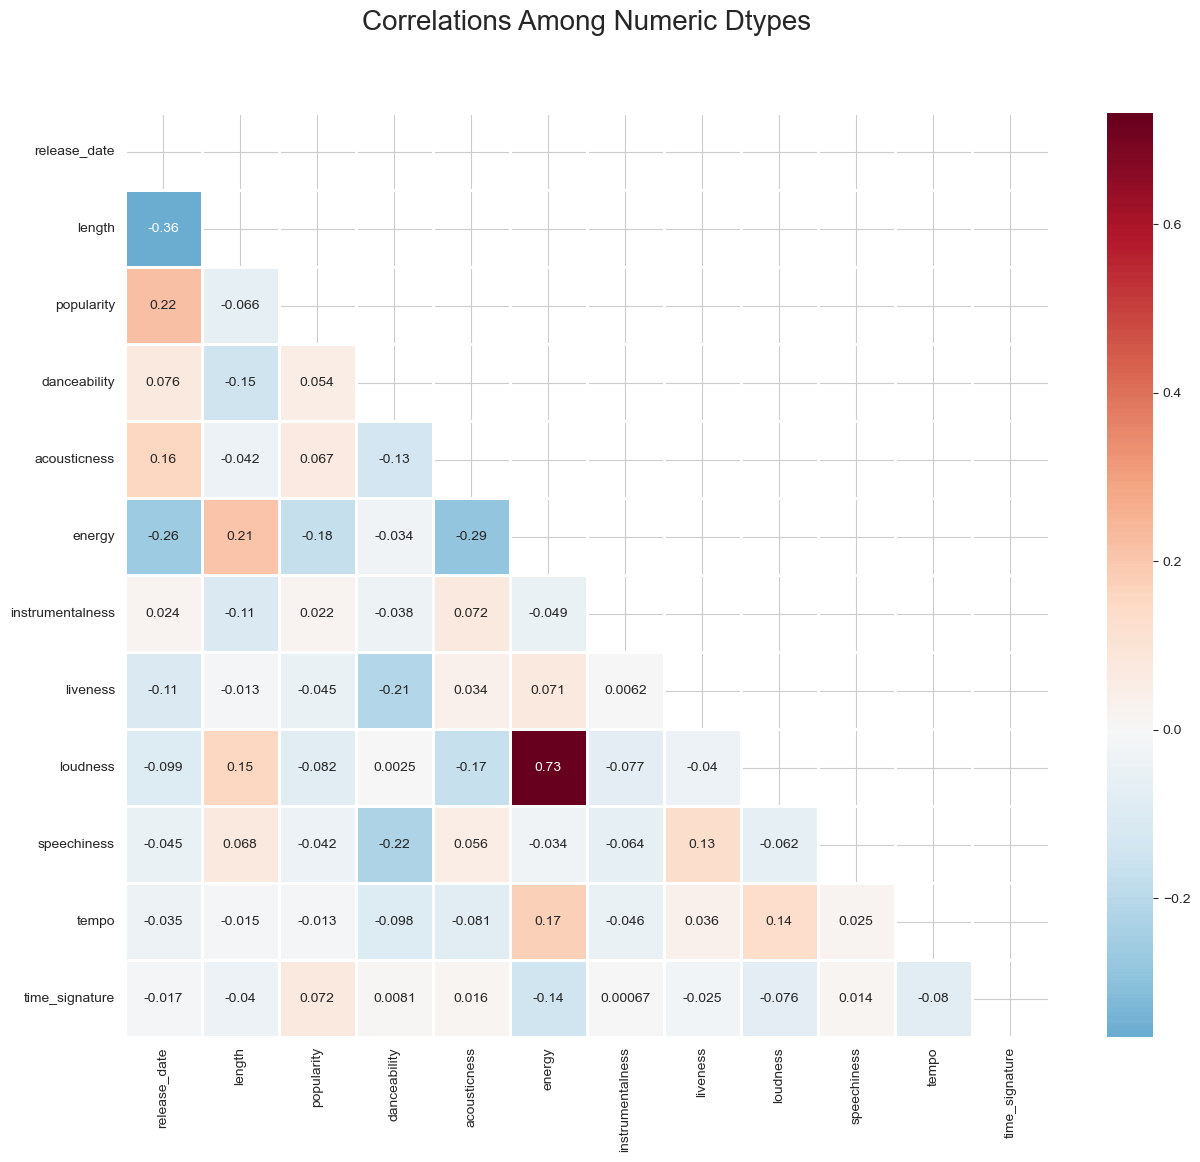

In [14]:
cor = df.corr()


mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(cor, 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Numeric Dtypes", y = 1.03,fontsize = 20, pad = 40)